In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
import re    # RegEx for removing non-letter characters
import nltk  #natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
import sklearn.preprocessing as pr
from sklearn import svm


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/juliorenteria/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Corona_test - Sentiment DataSet (Covid-19 Sentiment Analysis using SpaCy)
df1 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTAlzmCBwBHfu16mncGvX0-mASBEr5gxNc2HD_aO9-MQYdLoxFOqDN6jzrzwxh-4CfXKVycnu7b2Q1u/pub?gid=339865186&single=true&output=csv')

# Corona_train - Sentiment DataSet (Covid-19 Sentiment Analysis using SpaCy)
df2 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRYoji3s9J9-Wj3PZ1FxXuuFhN2vx71pc1e_r-ze50ipJT5dy8fuBt-297xkONn6uqe2lX3_5QhyjlC/pub?gid=1048792950&single=true&output=csv')

# Reddit_Data - Sentiment DataSet ("Twitter Sentiment Analysis LSTM)
df3 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTi-lmowjHHvYtte07fN7jSO1ldhMQf5yU2N4F4H6ZitkU4XuZXJ92eZR9x9TtZL1E34zjLCh6zZcZR/pub?gid=590633256&single=true&output=csv')

# Twitter_Data - Sentiment DataSet ("Twitter Sentiment Analysis LSTM) 
df4 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRm2WZ0y0BAqy0Kyu8eS19uhYQ55OmSpbKwb_2Yv9neSjVtO482VXMp_rFN8HsKEDQxACb9bJF8N_Lf/pub?gid=1279518690&single=true&output=csv')

# Tweet_dataset -
df5 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQCfruKWiD-aRgluRJ6Z5cGZNpjQ3FUTc30bFPvHq6CyMYCW5b28JcmWnlBlBCTaKmNLBCjX9pU6Jnp/pub?gid=1904450553&single=true&output=csv')

# Data Preprocesing

In [4]:
# Sentiment DataSet from "Covid-19 Sentiment Analysis using SpaCy"
print(df1.shape)
df1.head()

(3798, 6)


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [5]:
# Sentiment DataSet from "Covid-19 Sentiment Analysis using SpaCy"
print(df2.shape)
df2.head()

(41157, 6)


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [6]:
# Sentiment DataSet from "Twitter Sentiment Analysis LSTM" V. Twitter
print(df3.shape)
df3.head()

(37249, 2)


,clean_comment,category
0,family mormon have never tried explain them th...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [7]:
# Sentiment DataSet from "Twitter Sentiment Analysis LSTM" V. Reddit
print(df4.shape)
df4.head()

(162980, 2)


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [8]:
# Sentiment DataSet from "COVID-19 Vaccine Sentiment Analysis with fastai"
print(df5.shape)
df5.head()

(40000, 8)


,textID,sentiment,author,text,old_text,aux_id,new_sentiment,selected_text
0,1956967341,empty,xoshayzers,i know i was listenin to bad habit earlier an...,@tiffanylue i know i was listenin to bad habi...,p1000000000,NaN,NaN
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,Layin n bed with a headache ughhhh...waitin o...,c811396dc2,negative,headache
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,Funeral ceremony...gloomy friday...,9063631ab1,negative,gloomy
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,wants to hang out with friends SOON!,2a815f151d,positive,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,We want to trade with someone who has Houston...,@dannycastillo We want to trade with someone w...,82565a56d3,neutral,We want to trade with someone who has Houston ...


## Preprocessing for Df1 & Df2

In [9]:
# Concatenating DataFrames
frames = [df1, df2]
df_12 = pd.concat(frames)

print('concat finished correctly: ',df1.shape[0]+df2.shape[0]==df_12.shape[0])
print('result rows: ',df_12.shape[0])
df_12.tail()

concat finished correctly:  True
result rows:  44955


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know its getting tough when @KameronWilds...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


In [10]:
# Selecting useful information
df_12 = df_12[['OriginalTweet','Sentiment']]

# Changing column name
df_12 = df_12.rename(columns = {'OriginalTweet': 'text', 'Sentiment': 'sentiment'})

df_12.head()

,text,sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive
2,Find out how you can protect yourself and love...,Extremely Positive
3,#Panic buying hits #NewYork City as anxious sh...,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [11]:
# Getting value count for sentiment
df_12['sentiment'].value_counts(dropna=False)

Positive              12369
Negative              10958
Neutral                8332
Extremely Positive     7223
Extremely Negative     6073
Name: sentiment, dtype: int64

In [12]:
# Encoding setiment to {"Positive": 1, "Negative": -1, "Neutral":0}
cleanup_nums = {"sentiment": {"Positive": 1, "Negative": -1, "Neutral":0, "Extremely Positive":1, "Extremely Negative":-1}}
df_12_res = df_12.replace(cleanup_nums)
df_12_res.head()

,text,sentiment
0,TRENDING: New Yorkers encounter empty supermar...,-1
1,When I couldn't find hand sanitizer at Fred Me...,1
2,Find out how you can protect yourself and love...,1
3,#Panic buying hits #NewYork City as anxious sh...,-1
4,#toiletpaper #dunnypaper #coronavirus #coronav...,0


In [13]:
df_12_res.dtypes

text         object
sentiment     int64
dtype: object

## Preprocessing for Df3 & Df4

In [14]:
# Changing column names to concatenate
df3 = df3.rename(columns = {'clean_comment': 'text', 'category': 'sentiment'})
df4 = df4.rename(columns = {'clean_text': 'text', 'category': 'sentiment'})

# Concatenating DataFrames
#frames = [df3, df4]        # Commented to remove reddit db
#df_34 = pd.concat(frames)  # Commented to remove reddit db

df_34 = df4

print('concat finished correctly: ',df3.shape[0]+df4.shape[0]==df_34.shape[0])
print('result rows: ',df_34.shape[0])
df_34.tail()

concat finished correctly:  False
result rows:  162980


,text,sentiment
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0
162979,have you ever listen about like gurukul where ...,1.0


In [15]:
# Checking empty sentiments
df_34['sentiment'].value_counts(dropna=False)

 1.0    72250
 0.0    55213
-1.0    35510
 NaN        7
Name: sentiment, dtype: int64

In [16]:
# Dropping rows with empty sentiment
df_34 = df_34.dropna()

# Converting floats to ints
df_34['sentiment'] = df_34['sentiment'].astype(np.int64)

# Checking types
df_34.dtypes

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


text         object
sentiment     int64
dtype: object

In [17]:
df_34_res = df_34
df_34_res.head()

,text,sentiment
0,when modi promised “minimum government maximum...,-1
1,talk all the nonsense and continue all the dra...,0
2,what did just say vote for modi welcome bjp t...,1
3,asking his supporters prefix chowkidar their n...,1
4,answer who among these the most powerful world...,1


## Preprocessing for Df5

In [18]:
df5.head()

,textID,sentiment,author,text,old_text,aux_id,new_sentiment,selected_text
0,1956967341,empty,xoshayzers,i know i was listenin to bad habit earlier an...,@tiffanylue i know i was listenin to bad habi...,p1000000000,NaN,NaN
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,Layin n bed with a headache ughhhh...waitin o...,c811396dc2,negative,headache
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,Funeral ceremony...gloomy friday...,9063631ab1,negative,gloomy
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,wants to hang out with friends SOON!,2a815f151d,positive,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,We want to trade with someone who has Houston...,@dannycastillo We want to trade with someone w...,82565a56d3,neutral,We want to trade with someone who has Houston ...


In [19]:
# Selecting useful information
df5 = df5[['text','new_sentiment']]

# Changing column name
df5 = df5.rename(columns = {'text': 'text', 'new_sentiment': 'sentiment'})

# Checking for empty sentiments
df5['sentiment'].value_counts(dropna=False)

neutral     12668
positive     9897
negative     8830
NaN          8605
Name: sentiment, dtype: int64

In [20]:
# Dropping rows with emtpy sentiment
df5 = df5.dropna()

# Encoding setiment to {"Positive": 1, "Negative": -1, "Neutral":0}
cleanup_nums = {"sentiment": {"positive": 1, "negative": -1, "neutral":0}}
df5_res = df5.replace(cleanup_nums)

# Checking types
df5_res.dtypes

text         object
sentiment     int64
dtype: object

In [21]:
df5_res.head()

,text,sentiment
1,Layin n bed with a headache ughhhh...waitin o...,-1
2,Funeral ceremony...gloomy friday...,-1
3,wants to hang out with friends SOON!,1
4,We want to trade with someone who has Houston...,0
5,Re-pinging : why didn`t you go to prom? BC my ...,-1


## Concatenating al preprocessed DataFrames

[ df_12_res, df_34_res, df5_res ]

In [22]:
# Concatenating DataFrames
frames = [df_12_res, df_34_res, df5_res]
df_sent = pd.concat(frames)

print('concat finished correctly: ',df_12_res.shape[0] + df_34_res.shape[0] + df5_res.shape[0] == df_sent.shape[0])
print('result rows: ',df_sent.shape[0])

# Reseting Index for good measure
df_sent = df_sent.reset_index(drop=True)

concat finished correctly:  True
result rows:  239252


In [24]:
df_sent.head()

,text,sentiment
0,TRENDING: New Yorkers encounter empty supermar...,-1
1,When I couldn't find hand sanitizer at Fred Me...,1
2,Find out how you can protect yourself and love...,1
3,#Panic buying hits #NewYork City as anxious sh...,-1
4,#toiletpaper #dunnypaper #coronavirus #coronav...,0


In [25]:
# Save Concatenated DataFrames:
df_sent.to_csv('df_1245.csv', index=False)

# Exploratory Data Analysis

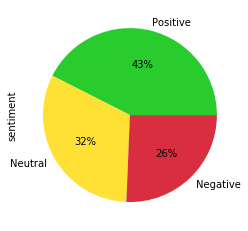

In [23]:
# Mapping back to descriptive sentiment for better interpretation
df_sent['sentiment'] = df_sent['sentiment'].map({-1:'Negative', 0:'Neutral', 1:'Positive'})

# Plotting Sentiment proportions
df_sent.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["#28cc2d", "#ffe135", "#d82e3f"])


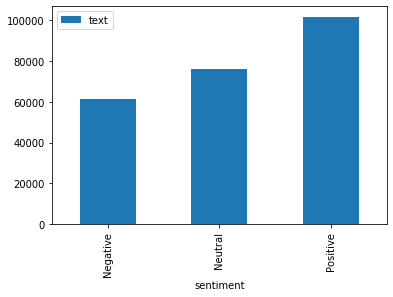

In [24]:
# Plotting Sentiment Distribution
df_sent.groupby('sentiment').count().plot(kind='bar')

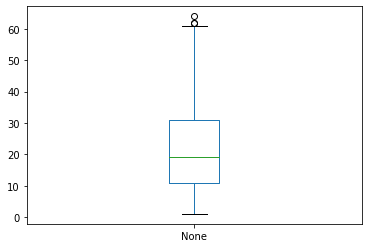

In [25]:
# Plotting Tweet Lenghts

# Calculate tweet lengths
tweet_len = pd.Series([len(tweet.split()) for tweet in df_sent['text']])

# The distribution of tweet text lengths
tweet_len.plot(kind='box')

# Tokenization

In [26]:
# Function to format, tokenize and remove stopwords from tweets.

def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''
    
    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

# Testing tweet_to_words Function
print("\nOriginal tweet ->", df_sent['text'][0])
print("\nProcessed tweet ->", tweet_to_words(df_sent['text'][0]))


Original tweet -> TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1

Processed tweet -> ['trend', 'new', 'yorker', 'encount', 'empti', 'supermarket', 'shelv', 'pictur', 'wegman', 'brooklyn', 'sold', 'onlin', 'grocer', 'foodkick', 'maxdeliveri', 'coronaviru', 'fear', 'shopper', 'stock', 'http', 'co', 'gr76pcrlwh', 'http', 'co', 'ivmkmsqdt1']


In [27]:
# Apply tokenization to each tweet and store as X
X = list(map(tweet_to_words, df_sent['text']))


In [28]:
# Encode target labels
le = LabelEncoder()
Y = le.fit_transform(df_sent['sentiment'])
                     

In [29]:
# Testing tokenization and encoding 
sel = 20
print(X[sel])
print(Y[sel])
print(le.inverse_transform([Y[sel]]))

['coronaviru', 'covid', '19', 'peopl', 'start', 'becom', 'frighten', 'panicshop', 'mani', 'shelv', 'meanwhil', 'turn', 'empti', 'good', 'sold', 'facemask', 'amp', 'disinfect', 'liquid', 'sold', 'sold', 'exorbit', 'price', 'blockchain', 'cryptonew', 'http', 'co', 'akr3lmlekf']
0
['Negative']


# Split Train Test Datasets

In [30]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

print('Number of tweets in the total set : {}'.format(len(X)))
print('Number of tweets in the training set : {}'.format(len(X_train)))
print('Number of tweets in the testing set : {}'.format(len(X_test)))

Number of tweets in the total set : 239252
Number of tweets in the training set : 191401
Number of tweets in the testing set : 47851


# Bag of Words

Here we will convert a collection of text documents to a matrix of token counts.

In [31]:
# Identifing number of features
flat_x = [item for sublist in X for item in sublist]
flat_x = list(dict.fromkeys(flat_x))
print(len(flat_x))

157363


In [32]:
# Convert a collection of text documents to a matrix of token counts
vocabulary_size = 5000    # Rounded up from 17422

# Generating Bag of Words
# Tweets have already been preprocessed hence dummy function will be passed in to preprocessor & tokenizer step
count_vector = CountVectorizer(max_features=vocabulary_size, preprocessor=lambda x: x, tokenizer=lambda x: x)


# Fit the training data
X_train = count_vector.fit_transform(X_train).toarray()

# Transform testing data
X_test = count_vector.transform(X_test).toarray()


In [33]:
# Normalize BoW features in training and test set
X_train = pr.normalize(X_train, axis=1)
X_test  = pr.normalize(X_test, axis=1)

In [34]:
# print first 200 words/tokens
print(count_vector.get_feature_names()[0:200])

['0', '00', '000', '1', '10', '100', '1000', '10000', '10th', '11', '1145', '12', '1200', '12000', '125', '13', '130', '14', '140', '14000', '15', '150', '157200000', '15l', '15lac', '15lakh', '16', '17', '18', '19', '1947', '1962', '1971', '1980', '1984', '19uk', '1st', '2', '20', '200', '2000', '2002', '2004', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2024', '2029', '21', '21st', '22', '23', '23rd', '24', '247', '24x7', '25', '250', '26', '2611', '27', '2cr', '2day', '2m', '2nd', '3', '30', '300', '3000', '30000', '31', '35', '350', '35a', '370', '3d', '3rd', '4', '40', '400', '4000', '45', '48', '4th', '5', '50', '500', '5000', '50000', '5th', '5year', '5yr', '6', '60', '600', '6000', '65', '6th', '7', '70', '700', '72000', '7200000', '72k', '75', '7th', '8', '80', '800', '8am', '9', '90', '9000', '99', 'aadhaar', 'aadhar', 'aadmi', 'aag', 'aaj', 'aam', 'aap', 'aay', 'aaya', 'aayega', 'aayog', 'ab

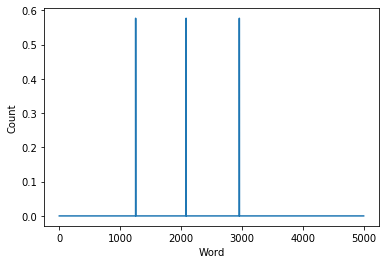

In [35]:
plt.plot(X_train[2,:])
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

In [47]:
random_forest = RandomForestClassifier(max_depth=5, random_state=0)
random_forest.fit(X_train, y_train)

# train accuracy
print('train accuracy: ',random_forest.score(X_train, y_train))

# Test accuracy
print('test accuracy: ',random_forest.score(X_test, y_test))

train accuracy:  0.4256456340353499
test accuracy:  0.4236484086017011


In [ ]:
svm = svm.SVC()
svm.fit(X_train, y_train)

# train accuracy
print('train accuracy: ',svm.score(X_train, y_train))

# Test accuracy
print('test accuracy: ',svm.score(X_test, y_test))

0.4236484086017011